In [1]:
import pandas as pd
df1=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
df1 = df1.rename(columns={'FAVC': 'frequent_cons_high_caloric_food', 'FCVC': 'frequency_cons_veg', 
                           'NCP': 'nb_main_meal', 'CAEC': 'cons_between_meal', 
                           'SCC': 'Suivi_calories', 'FAF': 'frequency_phys_act', 
                           'TUE': 'time_tech', 'CALC': 'cons_alcohol'})

In [3]:
df1['Gender'] = df1['Gender'].replace(['Male','Female'],[0,1])
df1['family_history_with_overweight'] = df1['family_history_with_overweight'].replace(['yes','no'],[1,0])
df1['frequent_cons_high_caloric_food'] = df1['frequent_cons_high_caloric_food'].replace(['yes','no'],[1,0])
df1['cons_between_meal'] = df1['cons_between_meal'].replace(['no','Sometimes','Frequently','Always'],[0,1,2,3])
df1['SMOKE'] = df1['SMOKE'].replace(['yes','no'],[1,0])
df1['Suivi_calories'] = df1['Suivi_calories'].replace(['yes','no'],[1,0])
df1['MTRANS'] = df1['MTRANS'].map({'Public_Transportation':0,
                             'Walking':1,'Automobile':2,
                             'Motorbike':3,'Bike':4},na_action=None)
df1['cons_alcohol'] = df1['cons_alcohol'].map({'no':0,
                             'Sometimes':1,'Frequently':2,
                             'Always':3},na_action=None)

In [4]:
df1.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_cons_high_caloric_food,frequency_cons_veg,nb_main_meal,cons_between_meal,SMOKE,CH2O,Suivi_calories,frequency_phys_act,time_tech,cons_alcohol,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II
5,0,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,2,Normal_Weight
6,1,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,3,Normal_Weight
7,0,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,Normal_Weight
8,0,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,Normal_Weight
9,0,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,Normal_Weight


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           2111 non-null   int64  
 1   Age                              2111 non-null   float64
 2   Height                           2111 non-null   float64
 3   Weight                           2111 non-null   float64
 4   family_history_with_overweight   2111 non-null   int64  
 5   frequent_cons_high_caloric_food  2111 non-null   int64  
 6   frequency_cons_veg               2111 non-null   float64
 7   nb_main_meal                     2111 non-null   float64
 8   cons_between_meal                2111 non-null   int64  
 9   SMOKE                            2111 non-null   int64  
 10  CH2O                             2111 non-null   float64
 11  Suivi_calories                   2111 non-null   int64  
 12  frequency_phys_act  

## Modele

In [6]:
len(df1)

2111

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [8]:
X = df1.drop('NObeyesdad', 1)
Y=df1['NObeyesdad']

In [9]:
Y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [10]:
model.fit(X,Y)
model.score(X,Y)

0.9204168640454761

In [11]:
model.predict(X)

array(['Overweight_Level_II', 'Insufficient_Weight', 'Overweight_Level_I',
       ..., 'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

1
1.0


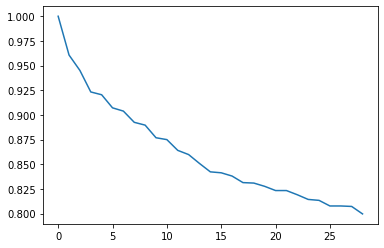

In [12]:
scores=[]
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X,Y)
    scores.append(model.score(X,Y))
    if best_score < model.score(X,Y):
        best_k=k
        best_score=model.score(X,Y)
        
print(best_k)
print(best_score)
plt.plot(scores)

## 2e modele

In [13]:
df2=df1.copy()

df2['NObeyesdad'] = df2['NObeyesdad'].map({'Insufficient_Weight':0,
                             'Normal_Weight':1,'Overweight_Level_I':2,
                             'Overweight_Level_II':3,'Obesity_Type_I':4,
                            'Obesity_Type_II':5,'Obesity_Type_III':6},na_action=None)

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
train=df2.sample(frac=0.66,random_state=200) #random state is a seed value
test=df2.drop(train.index)

X_train = train.drop('NObeyesdad', 1)
Y_train=train['NObeyesdad']
X_test = test.drop('NObeyesdad', 1)
Y_test=test['NObeyesdad']

In [16]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X_train, Y_train)

array([0.95515456, 0.9464166 , 0.93267835, 0.95170362, 0.9508982 ])

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.93882863323461 SVR(gamma=0.01)


In [18]:
grid.score(X_test,Y_test)

0.9558451041120604

### Affiner le grid search

In [19]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.9395205195516579 SVR(C=1.5, gamma=0.1)


In [20]:
grid.score(X_test,Y_test)

0.9579137375416337

In [21]:
'''
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)
'''

"\nparameters = {  'C'      : [1.5, 2, 2.5]   ,\n                'kernel' : ['rbf', 'poly', 'sigmoid'],\n                'gamma'  : [ 0.05, 0.10, 0.15] }\ngrid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)\ngrid.fit(X_train, Y_train)\nprint (grid.best_score_, grid.best_estimator_)\n"

In [22]:
'''
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)
'''

'\nparameters = {  \'C\'       : [2.5, 3, 4]   ,\n                \'kernel\'  : [\'rbf\', \'poly\', \'sigmoid\'],\n                \'gamma\'   : [ 0.01, 0.05, 0.07],\n                 "degree" : [1,3,5]}\ngrid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)\ngrid.fit(X_train, Y_train)\nprint (grid.best_score_, grid.best_estimator_)\n'

# Modeles sans poids et taille

In [23]:
df3=df2.copy()
df3=df3.drop('Height',1)
df3=df3.drop('Weight',1)

In [24]:
train=df3.sample(frac=0.66,random_state=200) #random state is a seed value
test=df3.drop(train.index)

X_train = train.drop('NObeyesdad', 1)
Y_train=train['NObeyesdad']
X_test = test.drop('NObeyesdad', 1)
Y_test=test['NObeyesdad']

In [25]:
def score(model):
    score=0
    for i in range(len(X_test)):
        p=round(float(model.predict(X_test.iloc[i:i+1,])),0)
        if (p==int(Y_test.iloc[i:i+1,])):
            score+=1

    return round((score/len(X_test))*100,2)

In [26]:
Lscores=[]

## SVM/ GridSearch

In [27]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
cross_val_score(svr, X_train, Y_train)

array([0.43019168, 0.41609745, 0.37117483, 0.36480696, 0.39917349])

### 1 param

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
#print (grid.best_score_, grid.best_estimator_)

round(grid.score(X_test,Y_test)*100,2)

84.02

In [29]:
score(grid)
Lscores.append(score(grid))

### 2 param

In [30]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
#print (grid.best_score_, grid.best_estimator_)

round(grid.score(X_test,Y_test)*100,2)

84.78

In [31]:
score(grid)
Lscores.append(score(grid))

### 3 param

In [32]:
'''
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, Y_train)
#print (grid.best_score_, grid.best_estimator_)

grid.score(X_test,Y_test)
'''

"\nparameters = {  'C'      : [1.5, 2, 2.5]   ,\n                'kernel' : ['rbf', 'poly', 'sigmoid'],\n                'gamma'  : [ 0.05, 0.10, 0.15] }\ngrid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)\ngrid.fit(X_train, Y_train)\n#print (grid.best_score_, grid.best_estimator_)\n\ngrid.score(X_test,Y_test)\n"

## Bagging

In [33]:
from sklearn.ensemble import BaggingRegressor
res=0
sc=0
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, Y_train)
    performance = algorithme.score(X_test, Y_test)
    sc+=score(algorithme)
    res+=performance
    
print(round((res/10)*100,2))

87.3


In [34]:
round(sc/10,2)
Lscores.append(round(sc/10,2))

## Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
algorithme = AdaBoostClassifier(n_estimators=50,learning_rate=1)
algorithme.fit(X_train, Y_train)
round(algorithme.score(X_test, Y_test)*100,2)

36.63

In [36]:
score(algorithme)
Lscores.append(score(algorithme))

## Extra tree

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
algorithme = ExtraTreesClassifier(n_estimators=100, random_state=0)
algorithme.fit(X_train, Y_train)
round(algorithme.score(X_test, Y_test)*100,2)

86.35

In [38]:
score(algorithme)
Lscores.append(score(algorithme))

## Gradient boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
algorithme = GradientBoostingRegressor(max_depth=1)
algorithme.fit(X_train, Y_train)
round(algorithme.score(X_test, Y_test)*100,2)

63.48

In [40]:
score(algorithme)
Lscores.append(score(algorithme))

## Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
algorithme = RandomForestClassifier(max_depth=2, random_state=0)
algorithme.fit(X_train, Y_train)
round(algorithme.score(X_test, Y_test)*100,2)

58.22

In [42]:
score(algorithme)
Lscores.append(score(algorithme))

## Knn

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
round(model.score(X_test, Y_test)*100,2)

75.91

In [44]:
score(algorithme)
Lscores.append(score(algorithme))

## Predictions

In [45]:
def Predictions(X):
    L=algorithme.predict(X)
    return [round(i,0) for i in L]

In [46]:
len(Lscores)

8

## Comparaison modeles

In [49]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.charts import defaults

defaults.width = 450
defaults.height = 350

output_notebook()

modeles = ['SVM 1 parameter','SVM 2 parameter','Bagging','Adaboost','Extra tree','Gradient boosting','Random forest','KNN']

colors=list(Spectral6)
colors.append('#ff33fc')
colors.append('#ff33ac')

source = ColumnDataSource(data=dict(modeles=modeles, Lscores=Lscores, color=colors))

p = figure(x_range=modeles, y_range=(0,100), height=250, title="Model Comparative",
           toolbar_location=None, tools="")

p.vbar(x='Model', top='Accuracy', width=1, color='color', legend_field="modeles", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

NameError: name 'xlocs' is not defined

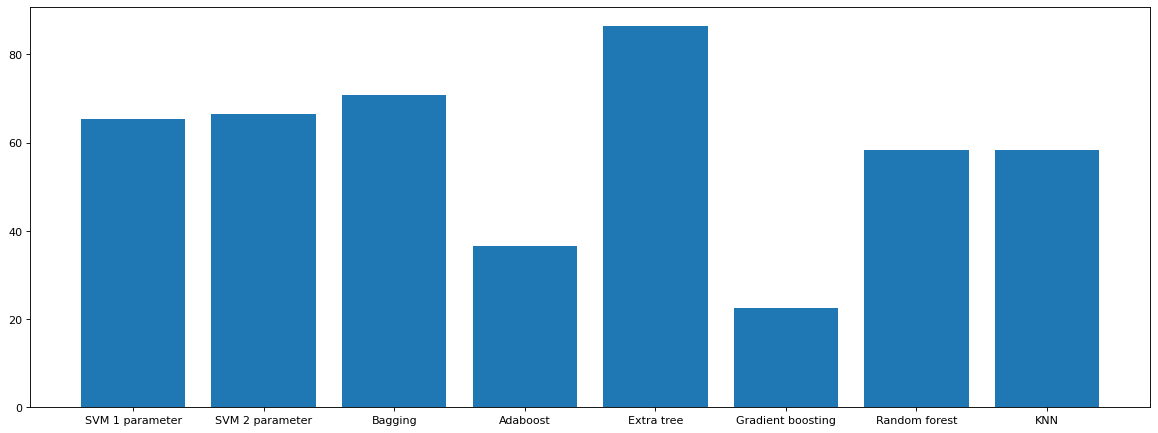

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_axes([0,0,1,1])
modeles = ['SVM 1 parameter','SVM 2 parameter','Bagging','Adaboost','Extra tree','Gradient boosting','Random forest','KNN']
ax.bar(modeles,Lscores)
for i, v in enumerate(Lscores):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
plt.show()

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_notebook()

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

p = figure(x_range=fruits, y_range=(0,9), height=250, title="Fruit counts",
           toolbar_location=None, tools="")

p.vbar(x='fruits', top='counts', width=0.9, color='color', legend_field="fruits", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [ ]:
color